### US VISA PRIDICTION PROJECT

## Life cycle of machine learning project
* Understanding the problem statement 
* Data collection
* Exploratory data analysis
* Data cleaning
* Data pre-processing
* Model training
* choose best model

## About

The immigration and Nationality Act(INA) of the US permit forign workers to come to the United State to work on either a temporary or permanent basis. The act also protect US workers against adverse impact on working place and manintain requirements when they hire forign workers to fill workforce shortages. The immigration programs are administrated by the office by the forign labour certification

## 1) Problem statement

* OFLC gives job certificate application for employers seeking to bring forign workers into the US and grants certificates.
* As in last year the count of employees were huge so OFLC needs Machine Learning models to shortlist visa applications based on their previous data.

# In this projects we are going to use the data given to build c classufication model:
 
 * This modelis to check if Visa get approved or not based on the given dataset.
 * This can be used to recommend a suitable profile for the application for whom the visa should be certified or denied on the certain criteria influence the decision.

## 2) Data collection

* The dataset is part of the office of OFLC
* The dataset consist of 25480 rows ans 12 columns
* Name of the dataset - Easy_visa_dataset on kaggle

# 2.1 Import data and required packages



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


# Import the CSV data as pandas DataFrame


In [48]:
df = pd.read_csv(r"EasyVisa.csv")

# Show top 5 records

In [49]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Shape of dataset


In [50]:
df.shape

(25480, 12)

# Summary of the dataset

In [51]:
# Display summary for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Check Datatype in the dataset

In [52]:
# check Null and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3 EXPLORING DATA

In [53]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [54]:
# proportion of count data on categorical columns
for col in categorical_feature:
    print(df[col].value_counts(normalize=True) * 100)
    print('-------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------
region_of_employment
Northeast    28.237834
South        27.539246
West    

# Insights
* case_id have unique values for each column which can be dropped as it is of no importance
* continent column is highly biased towards asia. hence we can combine other categories to form a single category
* unit_of_wage seems to be an impotant columns as most of them are yearly contacts.

# Univariate analysis

* The term univariate analysis reffers to the analysis of one variable prefix "uni" means  "one". The purpose of univeriate is to distribution of values for a single variable.

# Other types of analysis are

* Birvariate analysis: The analysis of two variables.
* Multivariate analysis: The analysis of the two or more variables.

# Numerical Features

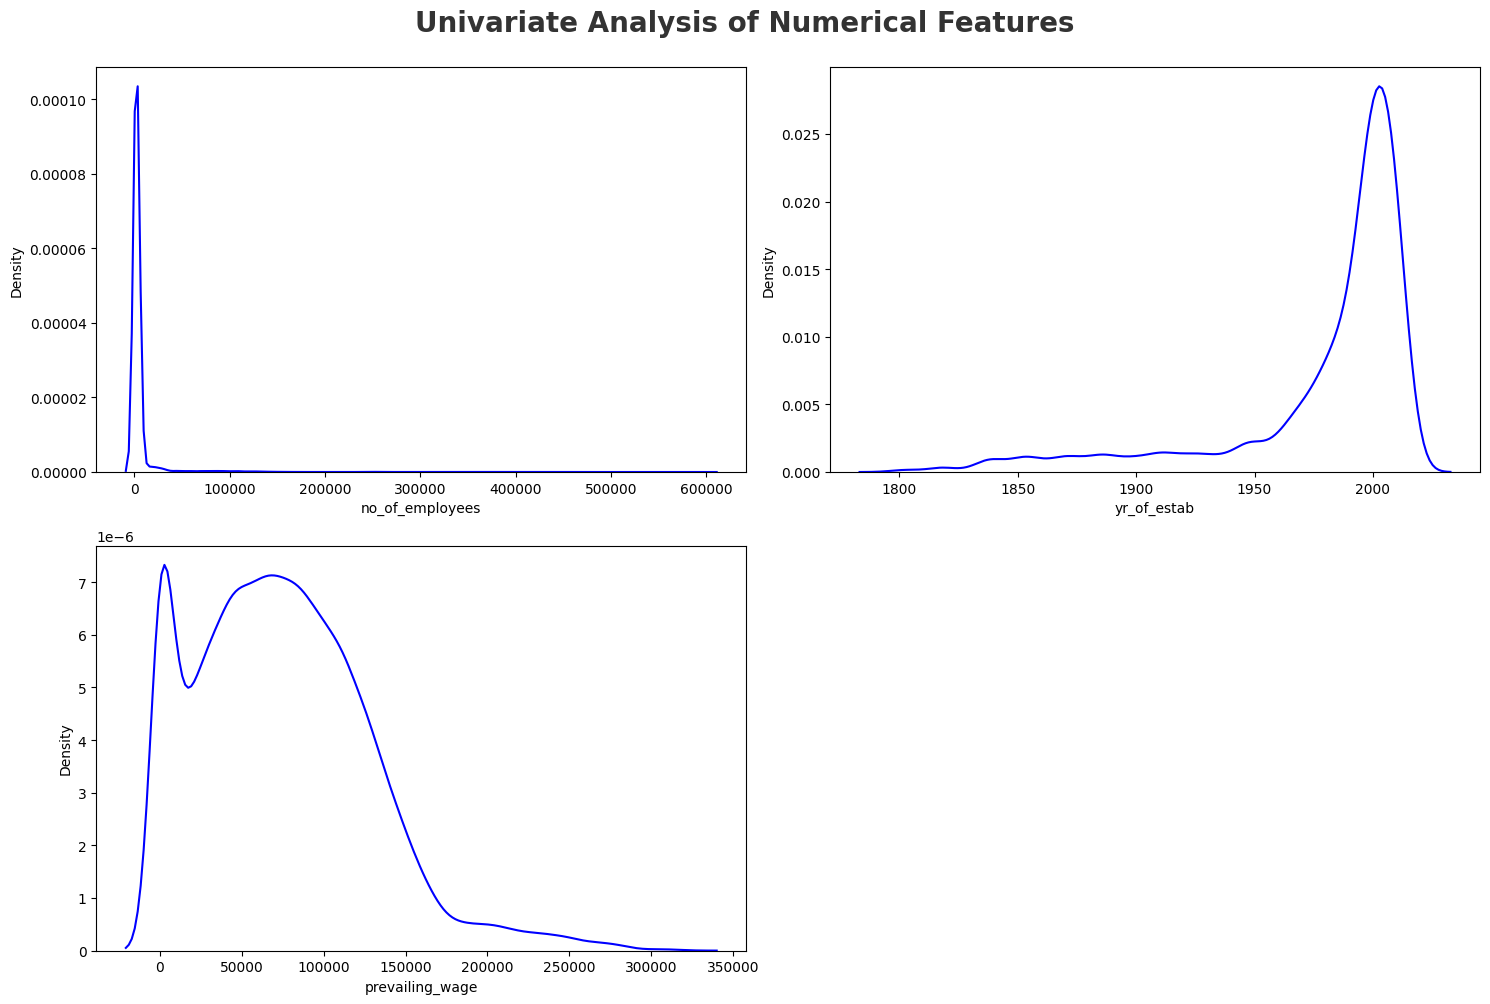

In [55]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_num.png')

# Insights

* no_of_employees column looks more skewed but it may be because of outlies.
* yr_of_estab is a discrete features.
* privailing_wage is a right-skewed distribution.

# Categorical Features


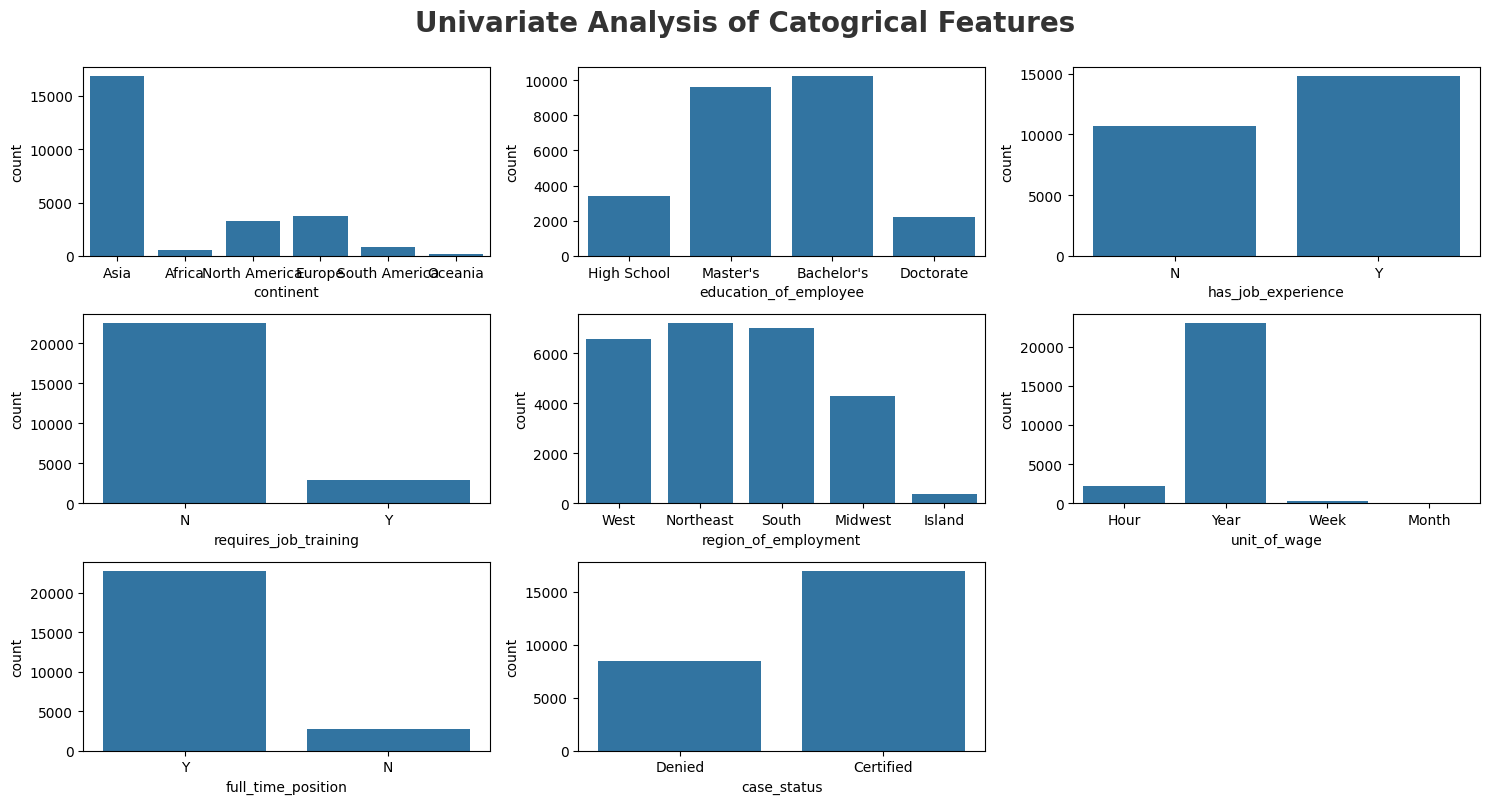

In [56]:
# Categorical columns
categorical_feature.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Catogrical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feature)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

#save plot
# plt.savefig('./images/Univariate_cat.png')

# Insights

* requires_job_traning, unit_of_wage, full_time_position and continents columns have single category dominating.
* In rest of the columns are balanced.

# Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [57]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continous_features: {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continous_features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Check multivariate in Numerical features

In [58]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Insights

* There is no multicolinearity between any variables

### Check Multicollinearity for Categorical features

* A chi-squared test is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test
* A chi-squared statistic in one way to show a relationship between two catogorical variables.
* Here we test correlation of Categorical columns with Target column i.e case_statis

Null Hypothesis(Ho): The Features is independent of the target column (No-Correlation)

Alternate Hypothesis(H1): The Features and Target column are not independent (correlated)

In [59]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Full to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Full to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


# Report

* here requires_job_traning fails to Reject Null Hypothesis which means it doesn't correlate with target column.

## Checking Null Values

In [60]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [61]:
continues_features = [feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


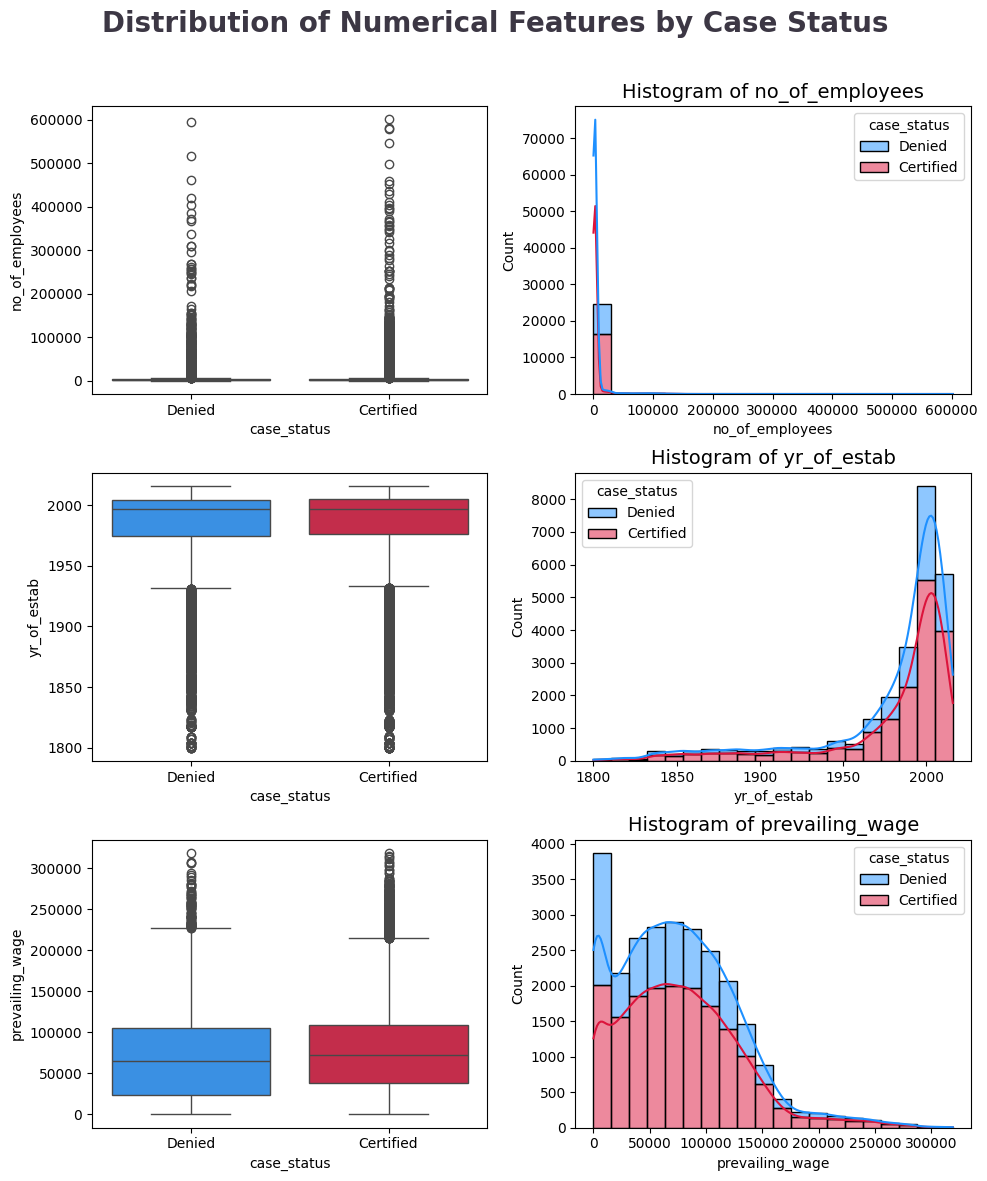

In [62]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features by Case Status', color='#3C3744', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

## Initial Analysis Report

* No of Employees has many outliers which can be handled in feature engineering and no_of_employees in right skewed.
* yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
* prevai ling_wage is right skewed with outliers above upper bound of box plot.
* there are no missing values in the dataset.
* the case_id column can be deleted because each row has unique values.
* the case_status column is the target to predict.
* in the categorical column, features can be made binary numerical in the feature encoding.

# 4. Visualization

## visualise the target feature

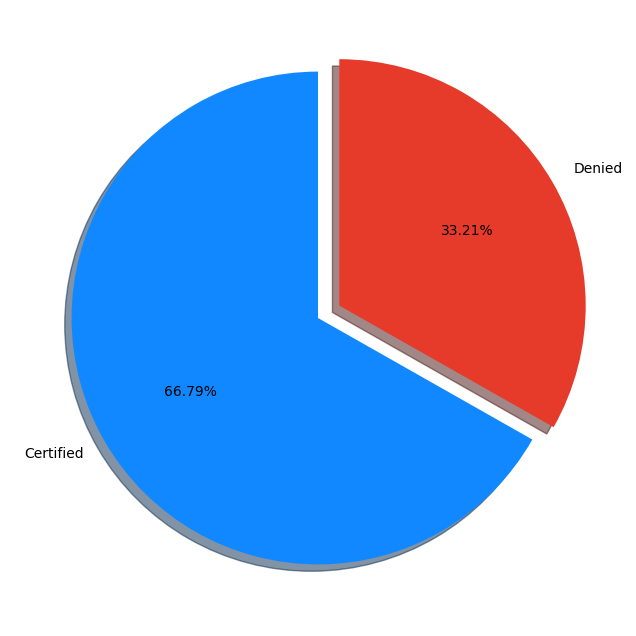

In [63]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]

# plot piechart with the ploty library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90, 
        autopct='%1.2f%%', explode=explode,shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the target variable is imbalanced.

## Does applicant Continent has any impact on Visa status?

In [64]:
# group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

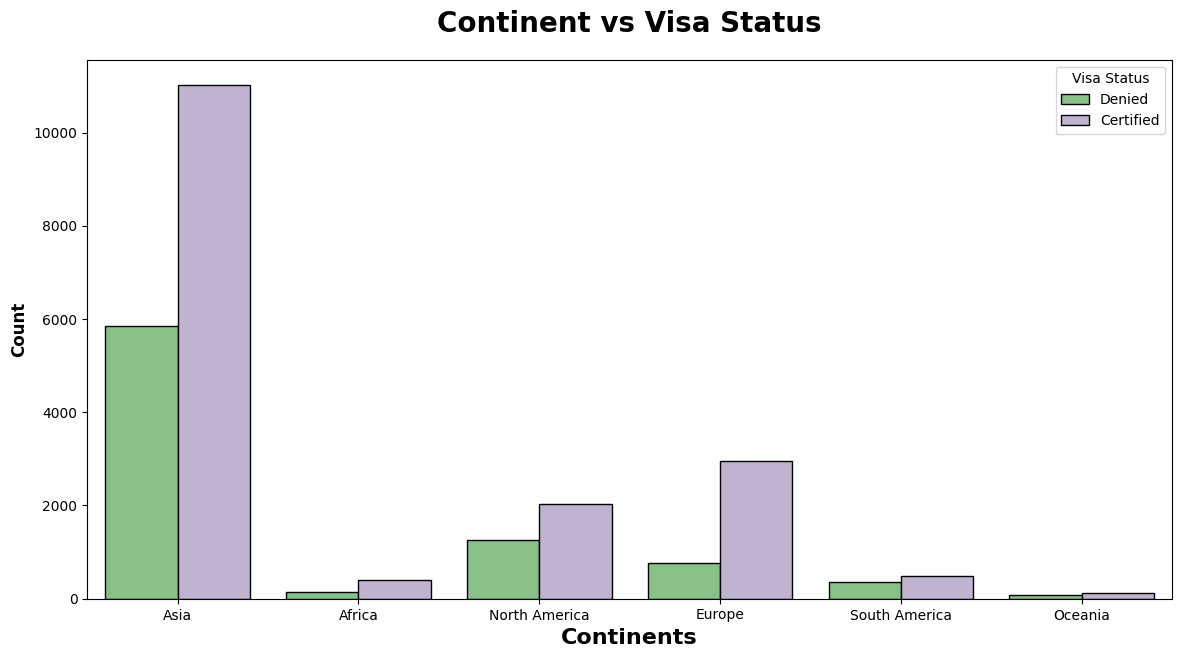

In [65]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [66]:
df2 = df.copy()

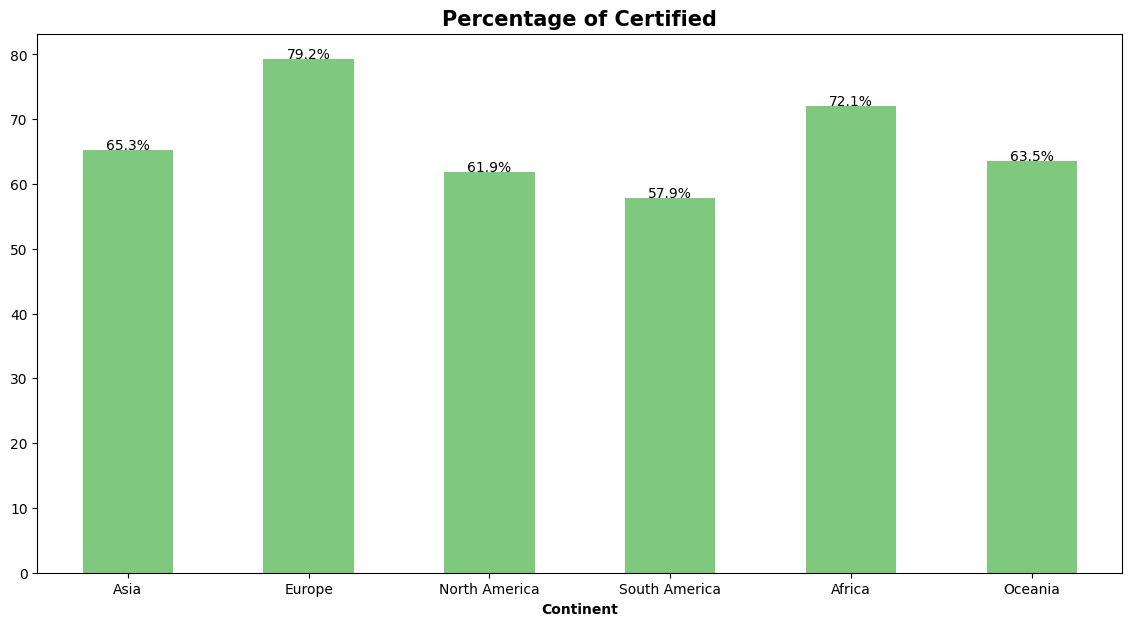

In [67]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report

* As per the chart Asia applicants applied more than other continents.
* 43% of certified applications are from asia.
* this is followed by Europe with 11% of Certified applications.
* Heighest chance of getting certified if you are from Europe and followed by Africa.

## Does applicant education has any impact on visa status?


In [68]:
# group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

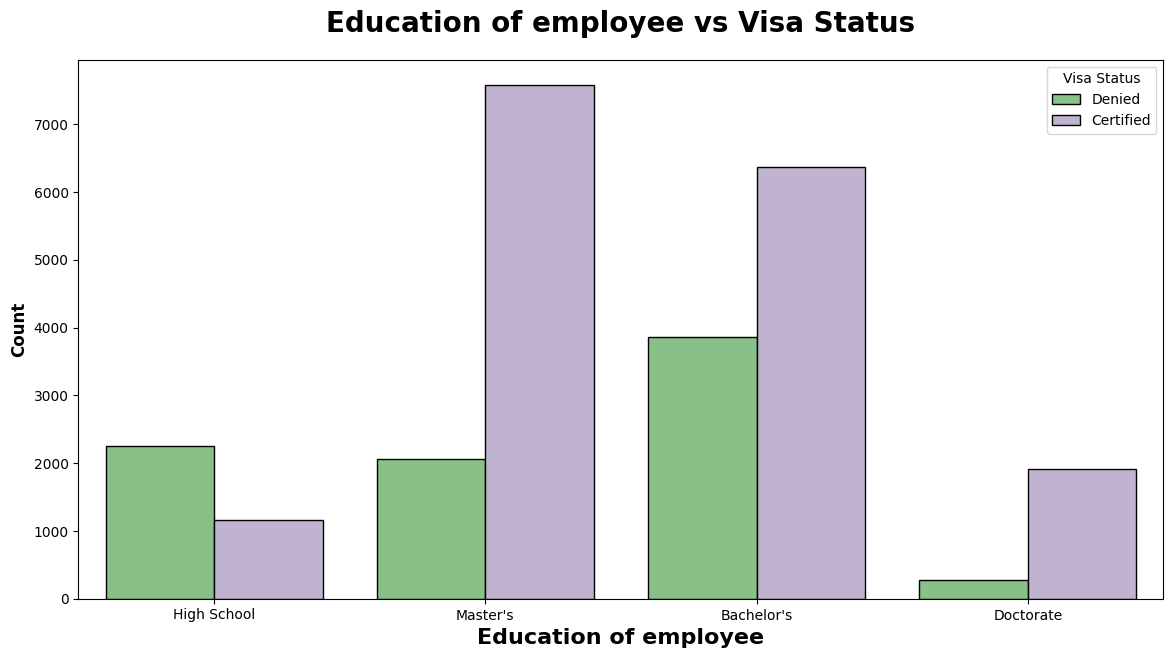

In [69]:
plt.subplots(figsize=(14,7))
sns.countplot(x='education_of_employee', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Education of employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

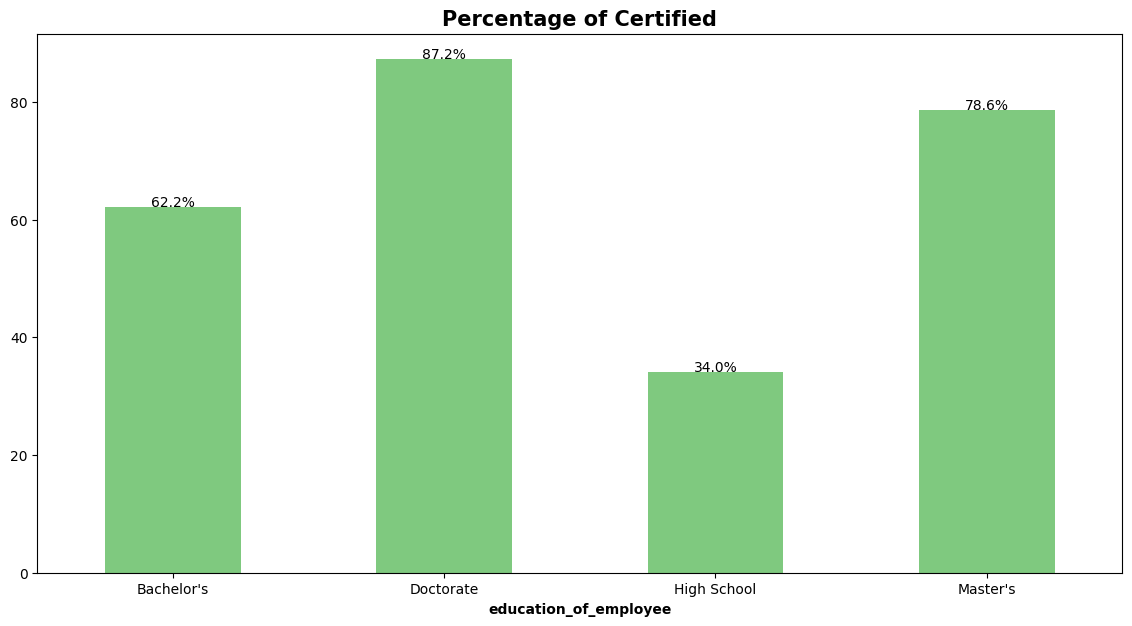

In [70]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Insights

* education status has high impact
* Doctorate and master's graduates have heigher chance of being accepted then the other.

## Does applicant's previous work experience has any impact on Visa status?


In [71]:
# group data by has_job_experience and their count of case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

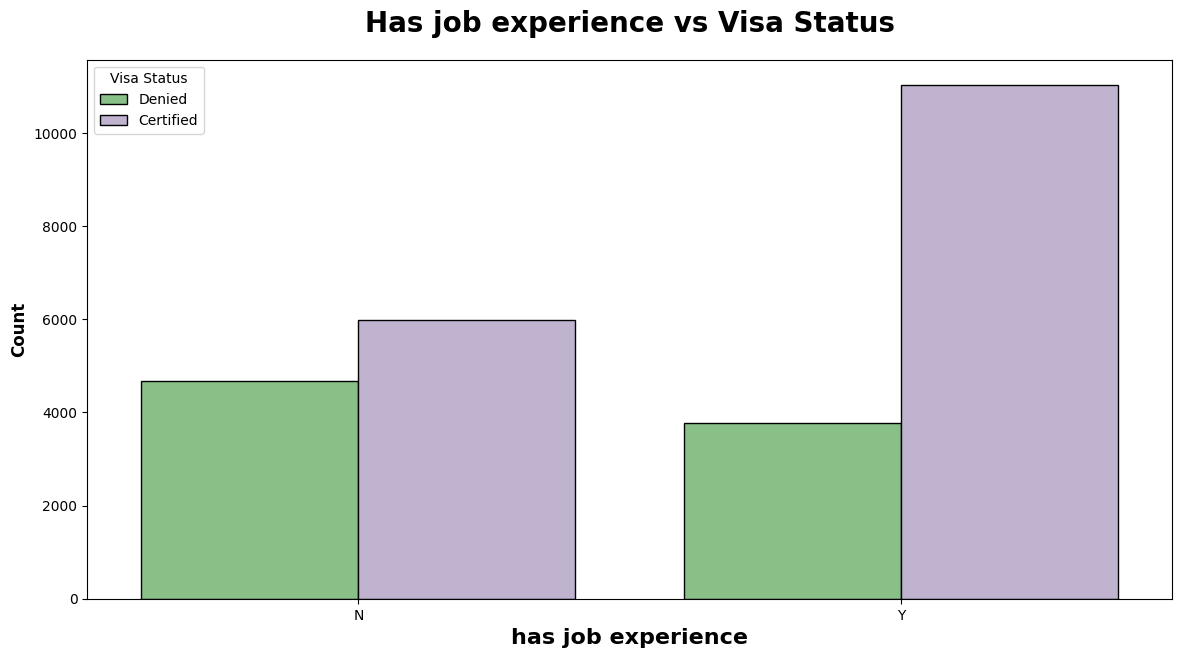

In [72]:
plt.subplots(figsize=(14,7))
sns.countplot(x='has_job_experience', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Has job experience vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("has job experience", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

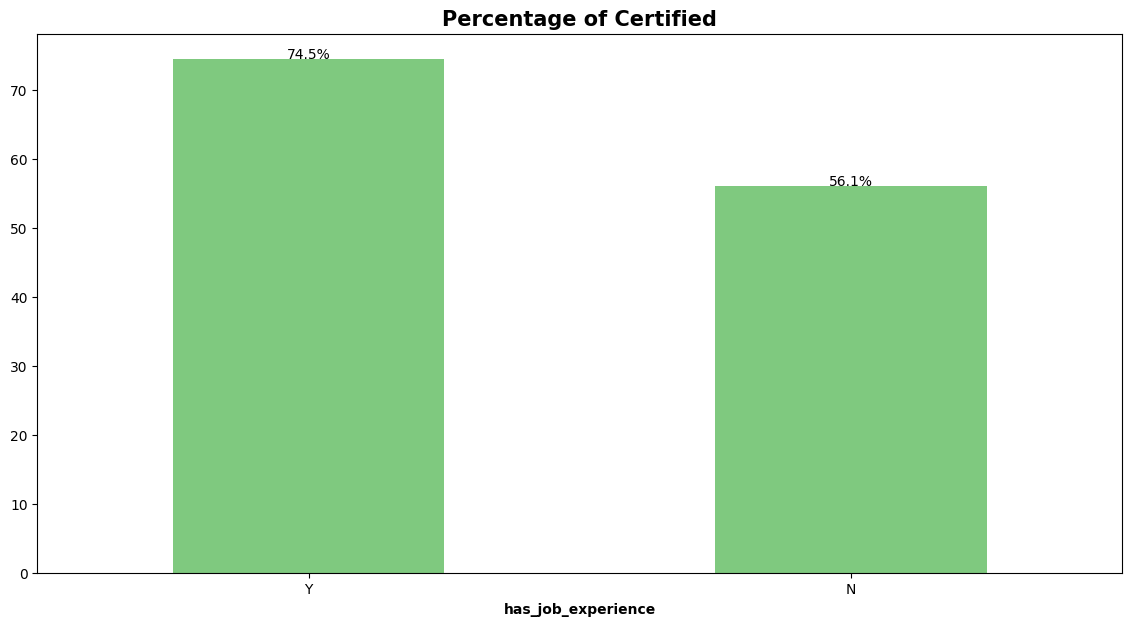

In [73]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report 

* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with no work experience has been certified 56% and denied 43%.
* This means work experience has effect on visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. but the difference is not huge.

## If the Employee requires job training , does it make any impact on visa status?


In [74]:
# group data by requires_job_training and their count of case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

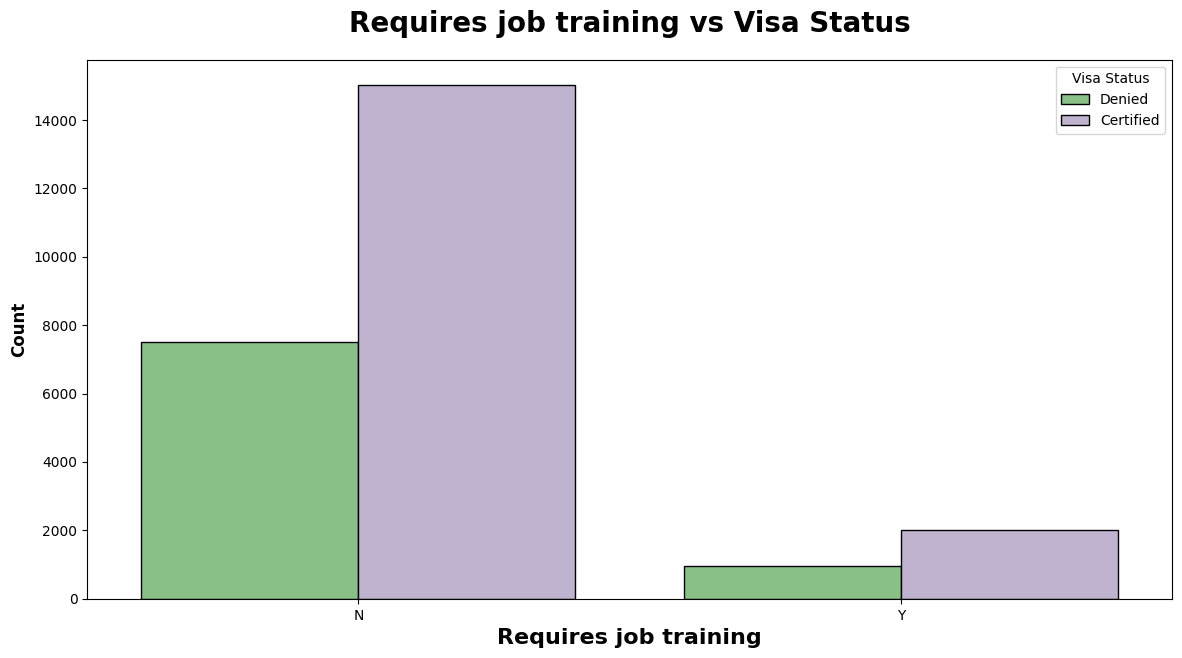

In [75]:
plt.subplots(figsize=(14,7))
sns.countplot(x='requires_job_training', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Requires job training vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires job training", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

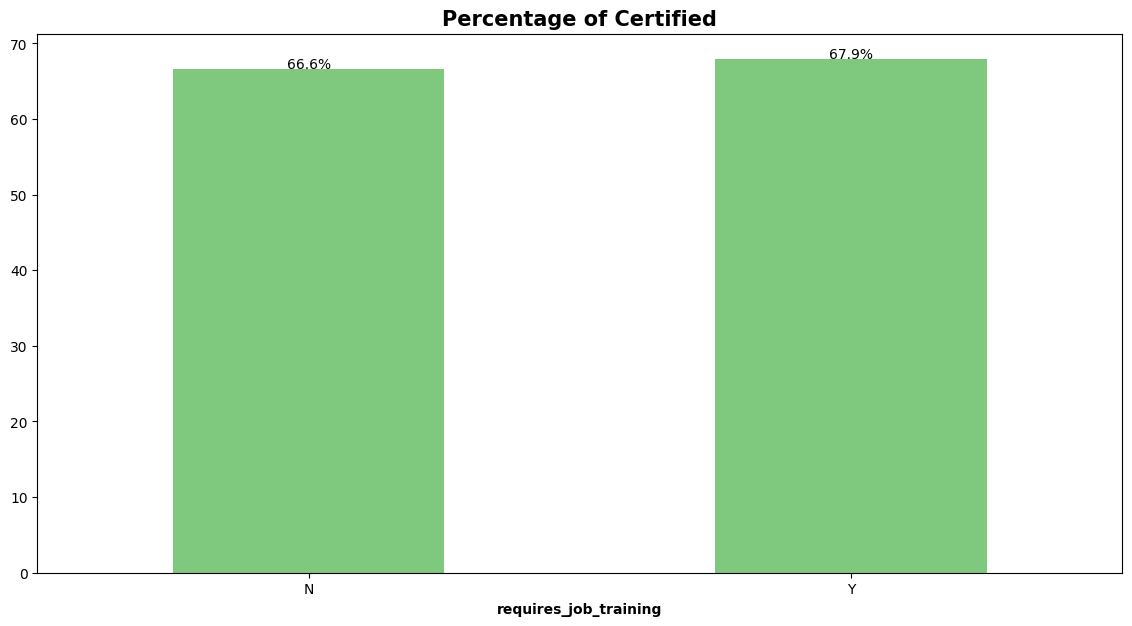

In [76]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report

* if employee requires job training and it doesn't have any effect on visa status.
* 88% of applicant don't requires job training.
* 63% of people who doesn't want job training got certified.
* for employee who requires job training 67% of people get cetified.
* as we checked in chi-squared test this features doesn't have much impact on target variables, which is confirmed by above plot.

## Does Number of employee of employer has any impact on visa status?


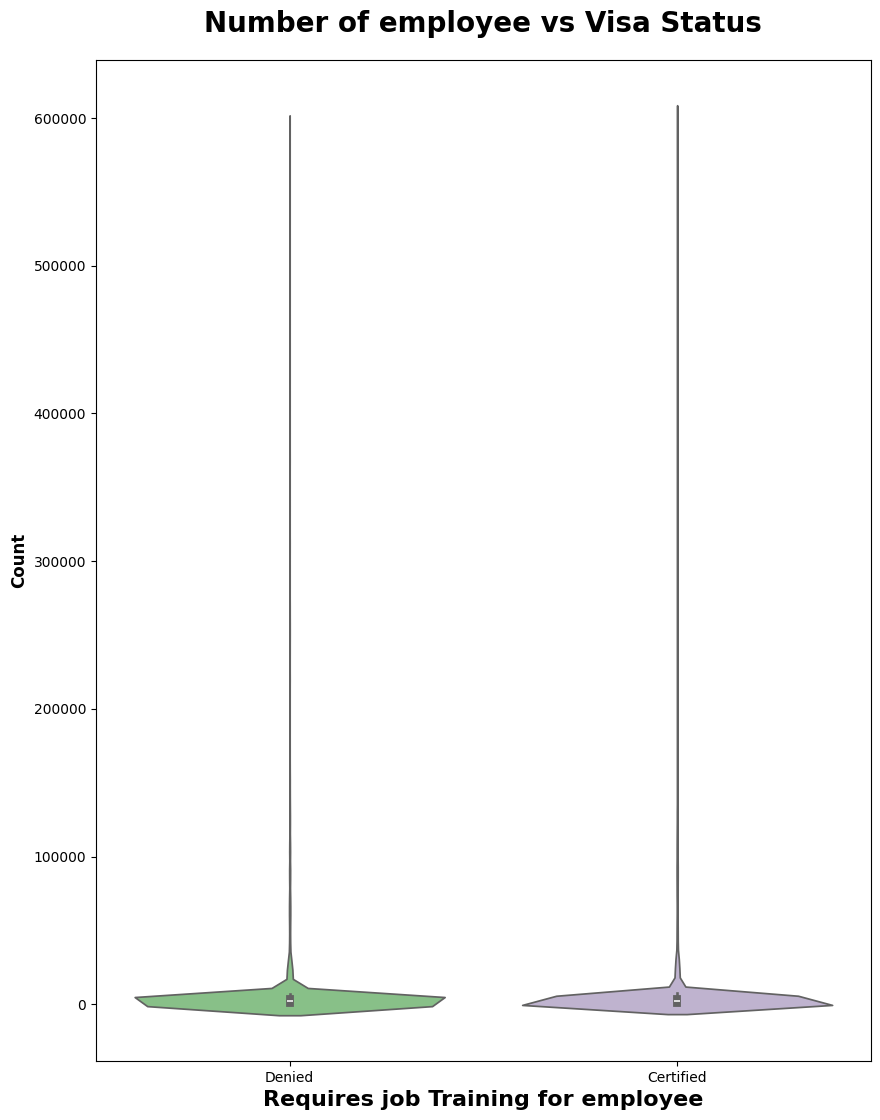

In [77]:
plt.subplots(figsize=(10,13))
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires job Training for employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

# Insights

* The distribution of both is similar, but there are outliers in both the classes which need to be handeled.

## Wages and its impact on visa status.

In [78]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

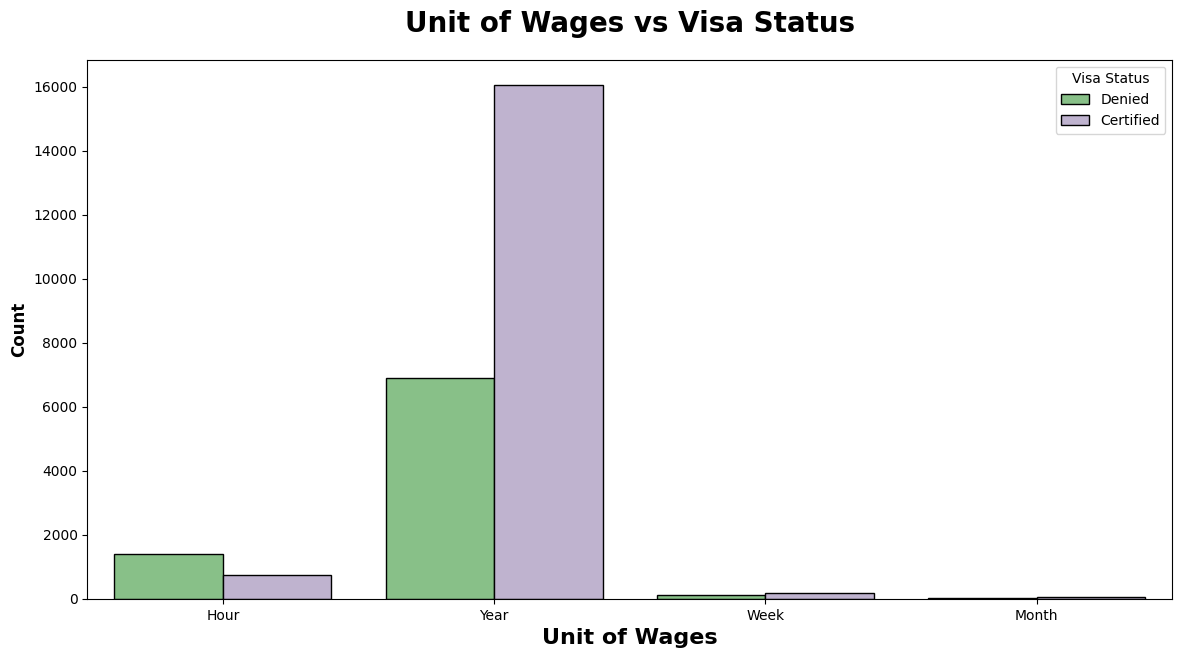

In [79]:
plt.subplots(figsize=(14,7))
sns.countplot(x='unit_of_wage', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Unit of Wages vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Unit of Wages", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

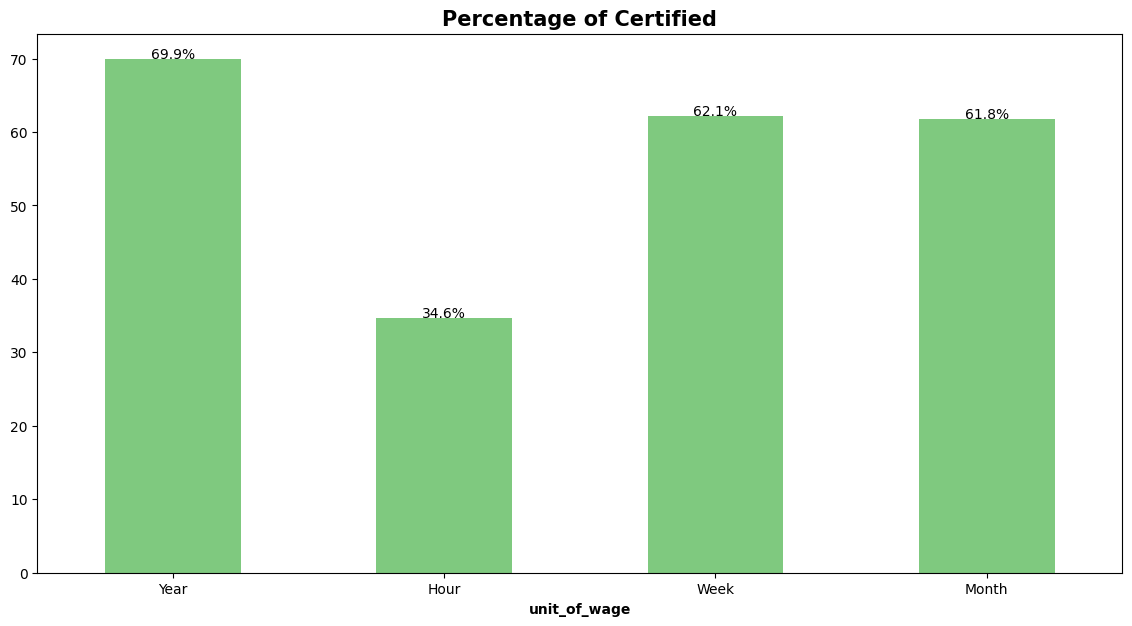

In [80]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report

* For employee who applied for hourly pay 65% of them denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a heigher chance of yearly contract then other and immediately followed by week and months.

## Does region of employment has impact on visa status?


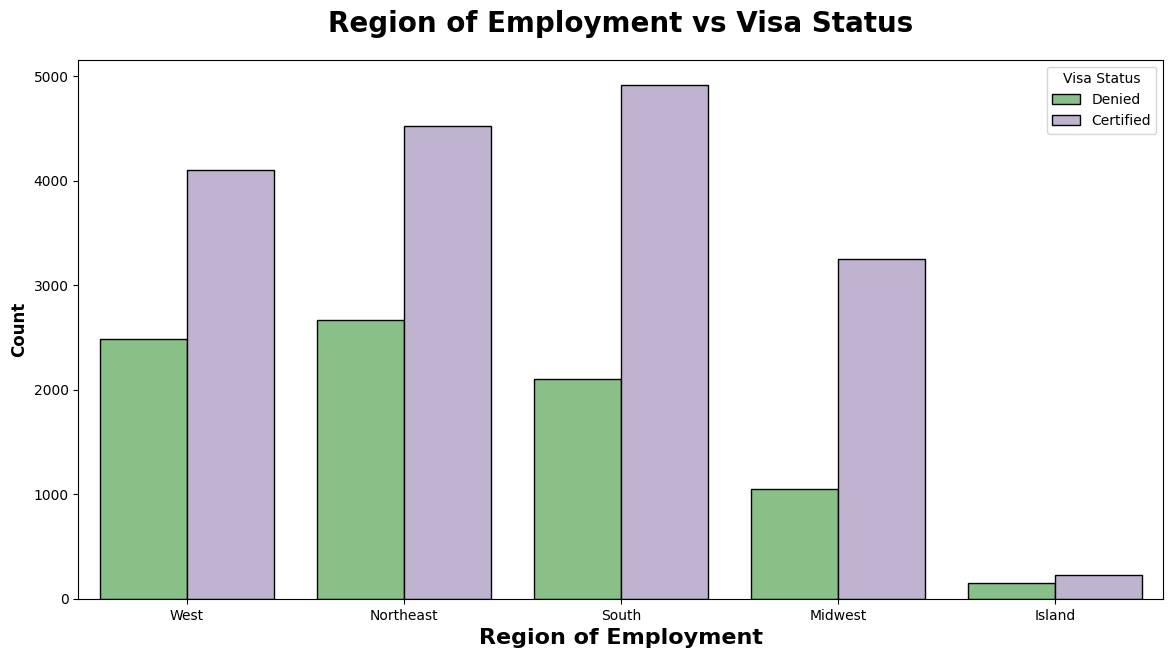

In [81]:
plt.subplots(figsize=(14,7))
sns.countplot(x='region_of_employment', hue="case_status", data=df, ec = "black", palette="Accent")
plt.title("Region of Employment vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Region of Employment", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

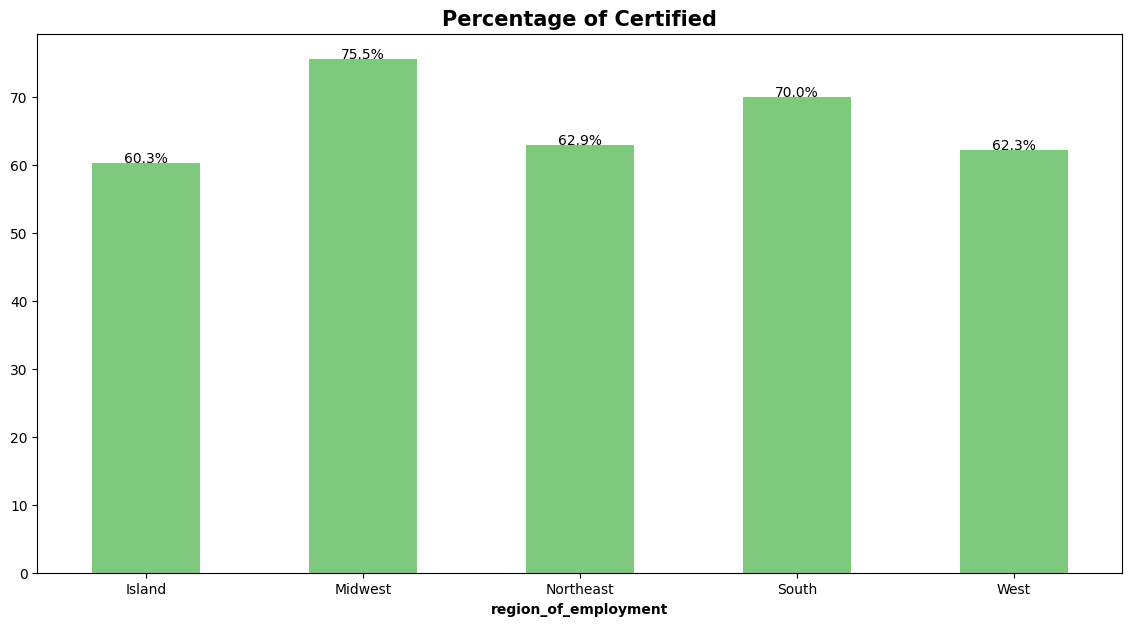

In [82]:
plt.figure(figsize=[14, 7])
(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Repot 

* As per chart all the region have similar pattern of getting visa certified and denied.
* There is a slight edge for midwest followed by south region.

## Does Prevailing wage has any impact on visa status?


In [83]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

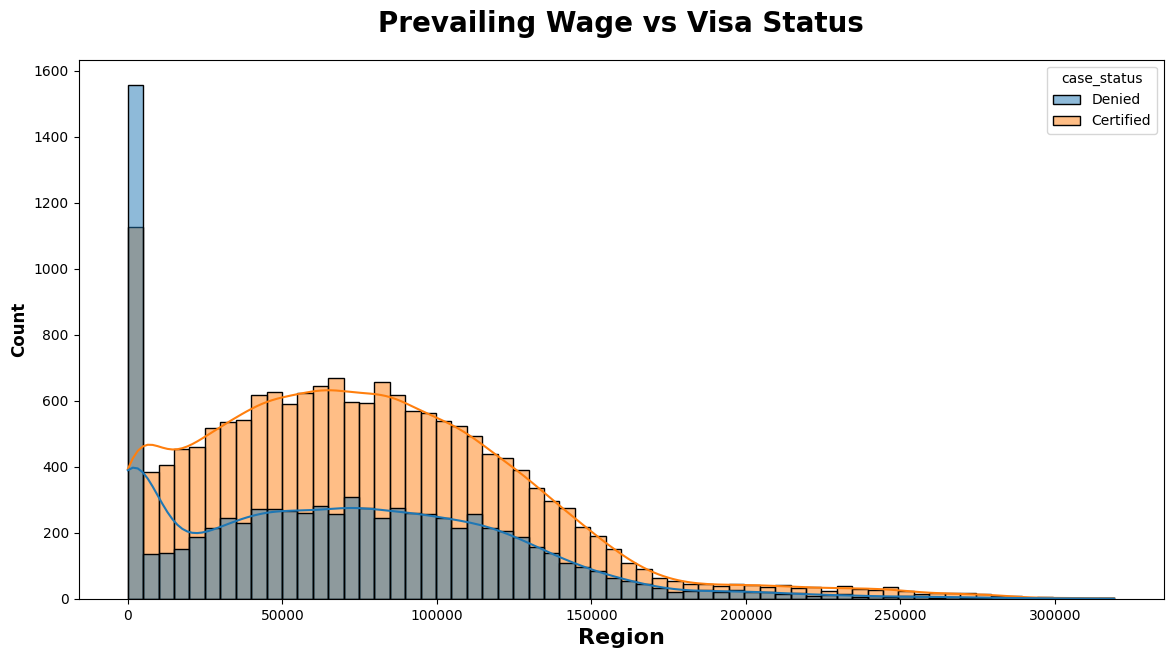

In [84]:
plt.subplots(figsize=(14,7))
sns.histplot(x='prevailing_wage', hue="case_status", data=df, kde=True)
plt.title("Prevailing Wage vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Region", weight="bold", fontsize=16)

plt.show()

# Insights

* The distribution of both the classes are the same but need to handle  the outliers.

### Prevailing wage based on Education

In [85]:
print('Average Prevailing wage based on Employee Education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Prevailing wage based on Employee Education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


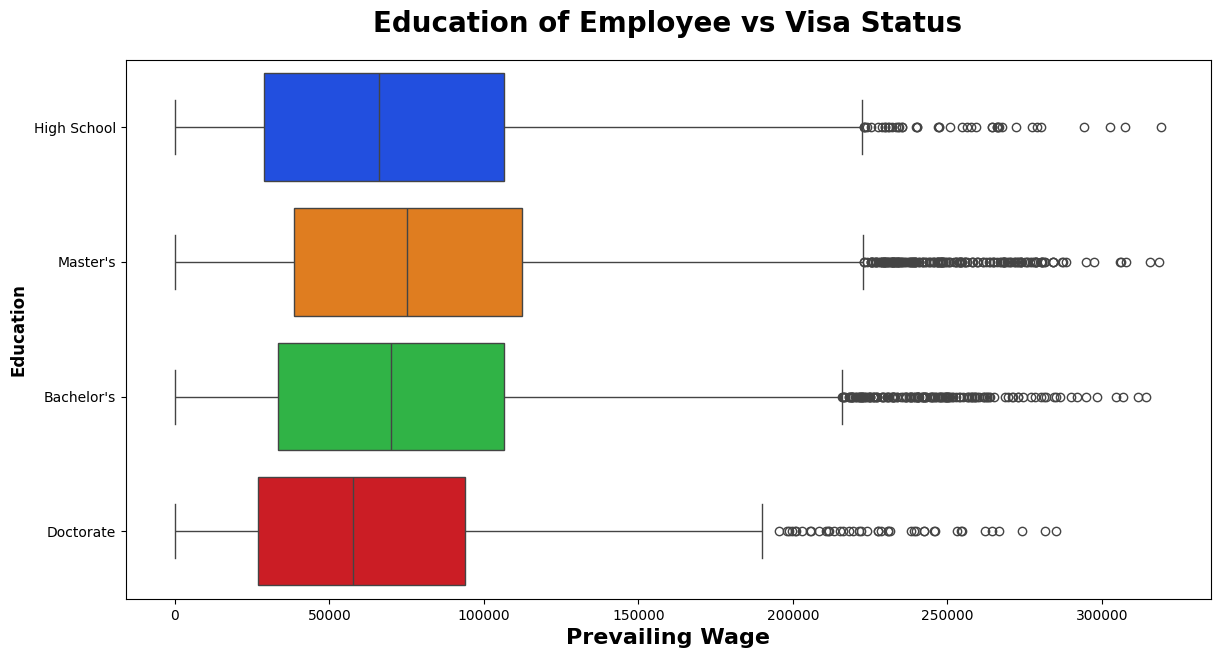

In [86]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='prevailing_wage', y="education_of_employee", data=df, palette='bright')
plt.title("Education of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)

plt.show()

## Report

Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

## Prevailing wage based on Job experience

In [87]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


## Report

Suprisingly people who has less job experience has more prevailing wage.
No job experience applicant has median prevailing wage as 72k USD.
Previous job experience applicant has median prevailing wage as 69K USD.

## Prevailing wage based on Continent

In [88]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


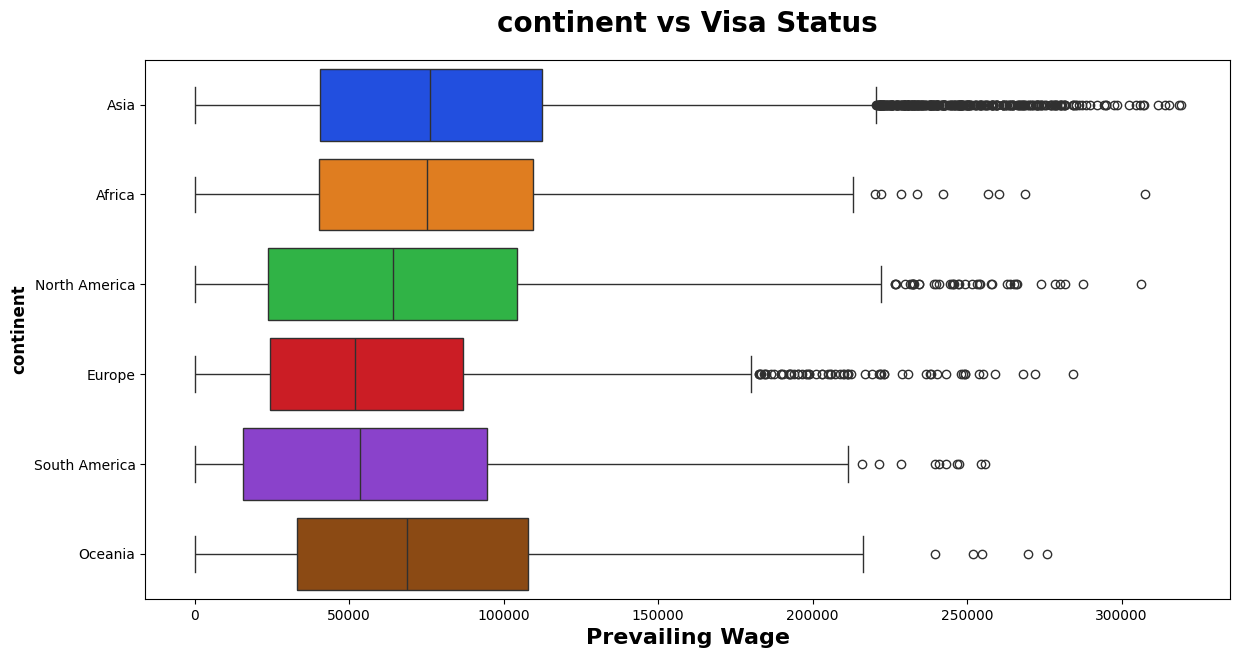

In [89]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

## Report

Average salary of people from Asia is higher than other continents.
## Year of Establishment

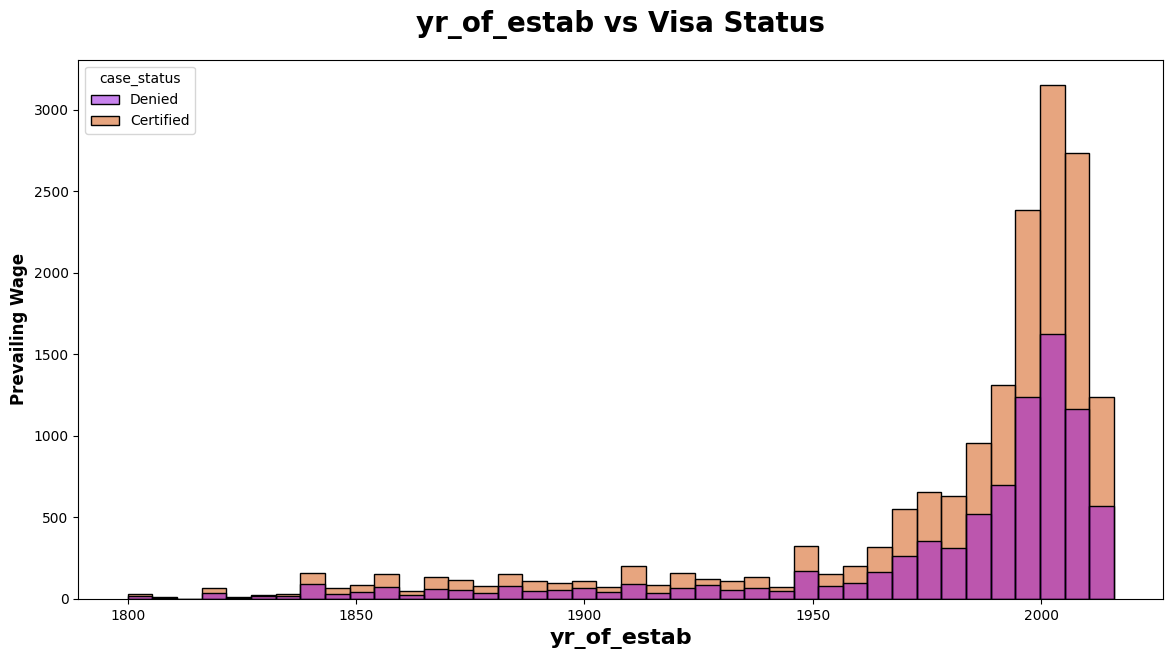

In [90]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

## Report

* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.
### Final Report
* case_id column can be dropped as it is an ID.
* requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in * visualization and chi2 test.
* no_of_employees, prevailing_wage columns have outllier which should be handled.
* continent columns has few unique values with very less count, which can be made as others
* Target column case_status is imbalanced can be handled before model building.

In [91]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################